# Grid Interpolation

In [1]:
import numpy as np
from astropy.io import fits
import glob
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline as USpline

In [2]:
files = glob.glob('../data/*.fits')
fname = files[0]
with fits.open(fname) as f:
    flux = f[1].data['flux']
    lmbd = 10**f[1].data['loglam']
    ivar = f[1].data['ivar']

In [3]:
grid = np.linspace(3650, 10400, 4000)
fxgd = np.zeros(grid.shape)

## Felix's Linear Interpolation Implementation

In [4]:
# init
gdx = 0
ldx = 1

# extrapolate left
slop = (flux[1] - flux[0]) / (lmbd[1] - lmbd[0])
while grid[gdx] < lmbd[0]:
    difx = lmbd[0] - grid[gdx]
    dify = slop * difx
    fxgd[gdx] = dify + flux[0]
    gdx += 1

# center
while gdx < len(grid):
    while ldx < len(lmbd) and lmbd[ldx] < grid[gdx]:
        ldx += 1
    if ldx >= len(lmbd):
        break
    slop = (flux[ldx] - flux[ldx - 1]) / (lmbd[ldx] - lmbd[ldx - 1])
    difx = lmbd[ldx] - grid[gdx]
    dify = slop * difx
    fxgd[gdx] = dify + flux[ldx]
    gdx += 1

# extrapolate right
slop = (flux[-1] - flux[-2]) / (lmbd[-1] - lmbd[-2])
while gdx < len(grid):
    difx = grid[gdx] - lmbd[-1]
    dify = slop * difx
    fxgd[gdx] = dify + flux[-1]
    gdx += 1

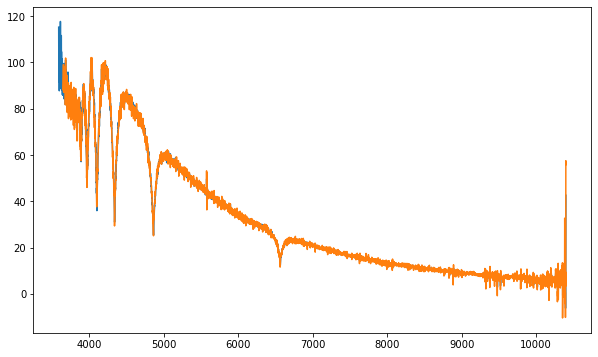

In [5]:
plt.figure(figsize=(10,6))
plt.plot(lmbd, flux)
plt.plot(grid, fxgd)

## Spline Library Linear Interpolation

In [6]:
linspl = USpline(lmbd, flux, ivar, k=1)
fxgd = linspl(grid)

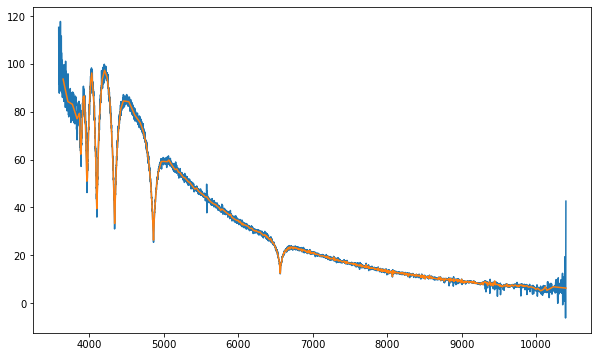

In [7]:
plt.figure(figsize=(10,6))
plt.plot(lmbd, flux)
plt.plot(grid, fxgd)

## Spline Library Polynomial Interpolation

In [8]:
plyspl = USpline(lmbd, flux, ivar, k=3)
fxgd = plyspl(grid)

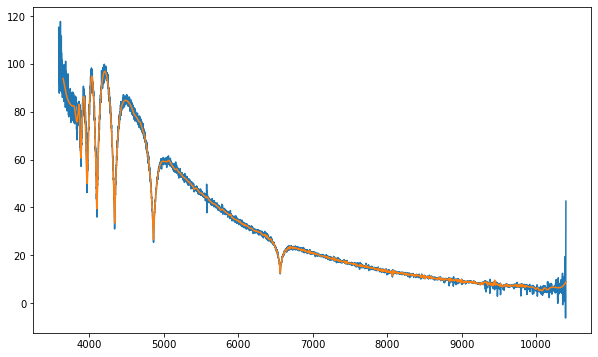

In [9]:
plt.figure(figsize=(10,6))
plt.plot(lmbd, flux)
plt.plot(grid, fxgd)